In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dt_col= ['target', 'ids', 'date', 'flag', 'user', 'text']
#dt_encode= "ISO-8859-1"
dt= pd.read_csv('twitter.csv', names=dt_col)
dt.shape


(1600000, 6)

In [3]:
dt.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [4]:
dt.sample(12)

,target,ids,date,flag,user,text
468283,0,2175960146,Mon Jun 15 02:30:17 PDT 2009,NO_QUERY,littlechefnet,my back is fooked again!!
126881,0,1834607248,Mon May 18 03:34:36 PDT 2009,NO_QUERY,Disfunctional,"Dying at work, feel really rough and can't sto..."
372033,0,2050606184,Fri Jun 05 18:58:33 PDT 2009,NO_QUERY,MISST2011,@kmukole aww. . . it was 9 months for me. wh...
662216,0,2243530402,Fri Jun 19 13:34:01 PDT 2009,NO_QUERY,V_is4Virginia,Really bummed to be missing All Points West th...
1042525,4,1957208264,Thu May 28 23:49:40 PDT 2009,NO_QUERY,yankee32879,@SandiHockeyMom : a lot of hot ladies huh?
639381,0,2234709565,Thu Jun 18 23:35:18 PDT 2009,NO_QUERY,serenadeborah,excited the new iPhone comes out mañana! I wan...
1165839,4,1979880884,Sun May 31 04:52:48 PDT 2009,NO_QUERY,BeckyMilnes,http://twitpic.com/6btgk - Enjoying the sun at...
751734,0,2286215455,Mon Jun 22 16:08:52 PDT 2009,NO_QUERY,BeyhannamoraLee,@soltrejames all the girls r coming over n ur ...
933338,4,1791807653,Wed May 13 21:10:02 PDT 2009,NO_QUERY,audioinjection,did some small tweaks I think it sounds good
418735,0,2061834614,Sat Jun 06 21:43:21 PDT 2009,NO_QUERY,JustJamie,Palm Pre looks boss/But no cool Apps/Sprint su...


<AxesSubplot:xlabel='target', ylabel='count'>

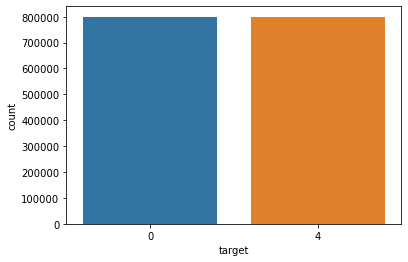

In [5]:
sns.countplot(x=dt['target'], data=dt)

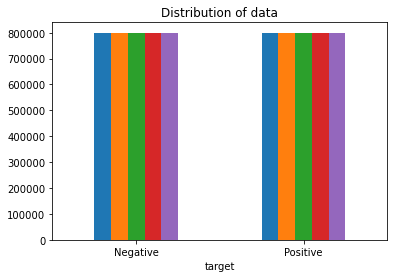

In [6]:
ax = dt.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(dt['text']), list(dt['target'])

In [7]:
data= dt[['text', 'target']]
data['target']= data['target'].replace(4,1)
data_pos= data[data['target']==1]
data_neg= data[data['target']==0]
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
dt=pd.concat([data_pos, data_neg])
dt['text']= dt['text'].str.lower()

<ipython-input-7-d62b62f0c4a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['target'].replace(4,1)


In [8]:
dt.sample(40)

,text,target
19132,congrats to @anyasnader for her confirmation! ...,0
806638,graham coxon on britpop: &quot;once the guardi...,1
13855,in the apple store today jack said &quot;mommy...,0
19077,three am. no sleep,0
15716,@kckaseyjames i haven't gotten an opportunity ...,0
810737,nothing..which is the best thing to do,1
816956,"@rhonda456 okay, okay, i'll bite i usually d...",1
812322,@oliviachoi i love nicole. i wish my girlfrien...,1
17696,"anyway, i am going to be super busy tomorrow, ...",0
803808,"joey uh oh, cs4 said &quot;excuse the interrup...",1


In [9]:
dt['text'].sample(50)

1436      @cyfyre no   finished two years then had twinz...
817387    has been chillin in the garden with a couple o...
17033     @girlandcowdog aww!  i thought it was sunny al...
5525                                   working in toledo.. 
801065    zombies can be cute... in cupcake form... on a...
819750    is at home, cleaning up the apt and getting re...
15643     @shantielforreal of course you;re in hollywood...
816715    @hurricanecassie i wanna play in the snow with...
8650      @ihenpecked leakage huh? i'm afraid i missed s...
811335                     is listening to 16 horse power  
817511    @ddlovato i love you soooo much demi  you are ...
5561                 so looks like i'll be going to school 
1938             @madninjacurl hey neighbor, neither can i 
7193      it's officially too damn early! my dark circle...
817999                                is going to the zoo! 
11108     wow. knew i should've gotten here early. they ...
813436    @timjackson oh yes, i know. i'

In [10]:
#punctuation
import string
eng_punct= string.punctuation
punct_list= eng_punct
def clean_punct(text):
    translator= str.maketrans(' ', ' ', punct_list)
    return text.translate(translator)
dt['text']= dt['text'].apply(lambda x:clean_punct(x))


#repeated char
def rep_char(text):
    return re.sub(r'(.)1+', r'1', text)
dt['text']=dt['text'].apply(lambda x: rep_char(x))

#numbers
def clean_num(data):
    return re.sub('[0-9]+', '', data)
dt['text']=dt['text'].apply(lambda x:clean_num(x))

#urls
def remove_urls(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
dt['text']=dt['text'].apply(lambda x: remove_urls(x))

dt['text'].sample(50)

807977    up super early this morning been up a few hrs ...
13119     tommcfly i hope youll come to germany one day ...
816238    alyssamilano thats a really interesting pictur...
9265      slgoodson i miss you too   how am i gonna surv...
815708                              good morning everyone  
13420     glennbookingbug oh no thats not fun  sent you ...
819349                       samira i found you on twitter 
16289     dipbaby im at the philly equivalent of club ca...
15560     feeling sorry for myself procrastinating homew...
803746    sloanelawdog morning  im well thanks  damn tho...
11168               has missed breakfast and is bummed out 
10731     apparently one is not to take a  pill without ...
803218    jobsworth my wife is from southall so were oft...
14929     ugh im pretty sure this is what dying feels like 
15811     yawwnnwere paitingi spilled yellow paint on th...
10594     flight today i woke up an hour later than i wa...
811081    mussomitchel haha cool u r so 

In [11]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dt['text'] = dt['text'].apply(tokenizer.tokenize)
#dt['text'].sample(50)

In [12]:
#stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dt['text']= dt['text'].apply(lambda x: stemming_on_text(x))

#lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dt['text'] = dt['text'].apply(lambda x: lemmatizer_on_text(x))

In [13]:
X= data.text
Y= data.target

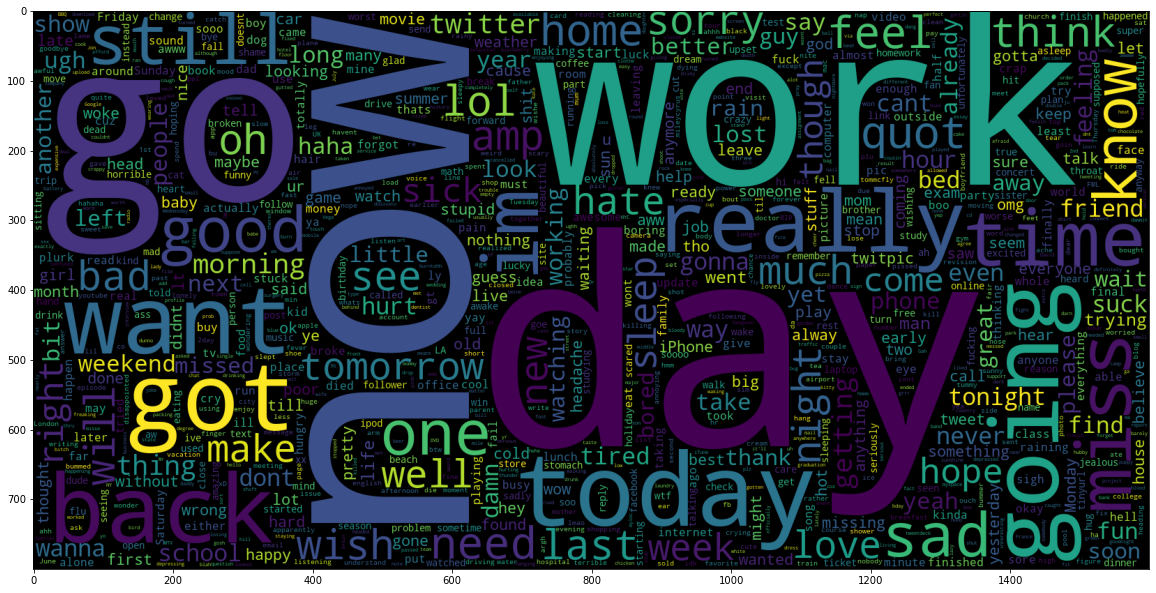

In [14]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

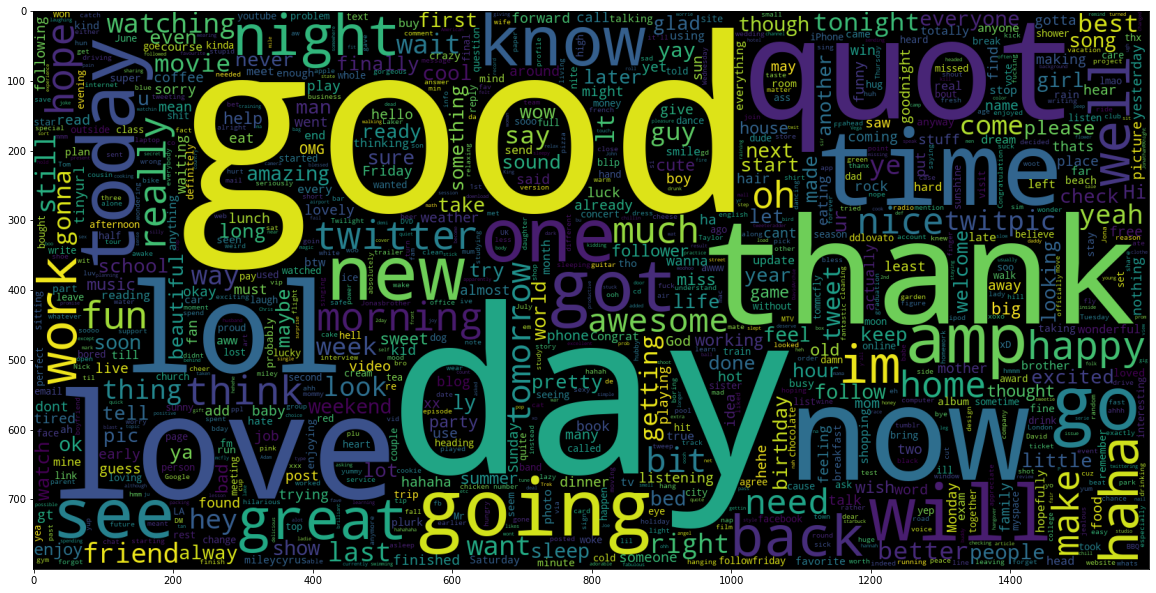

In [15]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [16]:
from sklearn.model_selection import train_test_split
xt1, xt2, yt1, yt2= train_test_split(X, Y, test_size= 0.1, random_state=0)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=20000)
xt1= cv.fit_transform(xt1)
xt2=cv.transform(xt2)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(C=2, max_iter=1000, n_jobs=-1, random_state=0)
classifier.fit(xt1,yt1)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1, random_state=0)

In [30]:
from xgboost import XGBClassifier
c2= XGBClassifier(max_depth=10)
c2.fit(xt1,yt1)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred= classifier.predict(xt2)

In [31]:
y_pred2= c2.predict(xt2)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(yt2, y_pred)
accuracy_score(yt2, y_pred)

0.799075

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2= confusion_matrix(yt2, y_pred2)
accuracy_score(yt2,y_pred2)

0.77621875